# Project on CHESS (KING-ROOK V/S KING)

Author: MAYANK DUBEY 


# Introduction

Chess is a two-player strategy board game played on an 8 × 8 checkered board with 64 squares. The history of chess can be drawn back to around 1500 years, it was started in the North of India and spread throughout the world. Each player begins with 16 pieces one king, one queen, two rooks, two knights, two bishops and eight pawns. Each type of piece moves uniquely of which the most powerful is the queen and the least powerful is the pawn. Although the rules of the game have been amended multiple times the main objective is to checkmate the opponent’s king by placing it under an inescapable threat of capture. The invention of databases and chess engines in the 20th century revolutionized chess.

# Project and Data set Description

The goal of the project is to predict the number of moves (from 0-16) required to win for white with a king and a rook, given the position of white king, white rook and black king. It is a multiclass classification problem. The dataset has 28,056 rows and has the following attributes <br> 
1. White King file (column)       - X1 <br>
2. White King rank (row)           - X2 <br>
3. White Rook file 	          -X3<br>
4. White Rook rank 	          -X4 <br>
5. Black King file 		         - X5 <br>
6. Black King rank 	          -X6 <br>
7. optimal depth-of-win for White in 0 to 16 moves, otherwise drawn {draw, zero, one, two, ..., sixteen}. - Y <br>


data set is available on following link <br>
https://archive.ics.uci.edu/ml/datasets/Chess+(King-Rook+vs.+King)

# Modelling Used

We are using the following methods on the dataset: <br>
●	Multinomial Logistic Regression <br>
●	Decision Tree <br>
●	Random Forest <br>
●	Boosting algorithm’s 

# Chess board

In a chessboard a, b, c, d, e, f, g, h be the columns and 1, 2, 3, 4, 5, 6, 7, 8 be the rows where we place the pieces.

If we take an example from the dataset, the white king is placed in column a and row 1, white rook is placed in column c and row 2, black king is placed in column c and row 1 and if it is black to move then the result is a draw as shown in Figure 1.


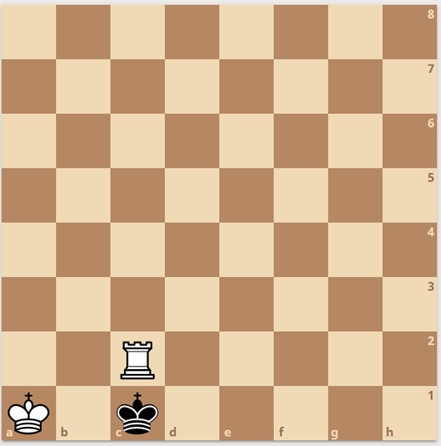
figure - 1

One of the position from the data set

# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.classification import *

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import multilabel_confusion_matrix

# Loading dataset

In [3]:
df = pd.read_csv('krkopt.data')

In [4]:
df.head()

,a,1,b,3,c,2,draw
0,a,1,c,1,c,2,draw
1,a,1,c,1,d,1,draw
2,a,1,c,1,d,2,draw
3,a,1,c,2,c,1,draw
4,a,1,c,2,c,3,draw


In [5]:
df = df.rename(columns={"a": "White King file (column)", "1": "White King rank (row)",
       "b": "White Rook file" ,"3": "White Rook rank" , 
        "c": "Black King file", "2" : "Black King rank",
        "draw": "moves to win"})

Firstly, renamed the columns present in the data frame with more relevant and simpler words like white king file, black king rank, moves to win etc. 

In [6]:
df.head()

,White King file (column),White King rank (row),White Rook file,White Rook rank,Black King file,Black King rank,moves to win
0,a,1,c,1,c,2,draw
1,a,1,c,1,d,1,draw
2,a,1,c,1,d,2,draw
3,a,1,c,2,c,1,draw
4,a,1,c,2,c,3,draw


In [7]:
moves_count = df['moves to win'].value_counts()

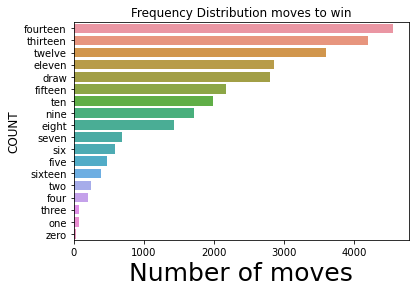

In [8]:
sns.barplot( moves_count.values, moves_count.index,alpha= 1)
plt.title('Frequency Distribution moves to win')
plt.ylabel('COUNT', fontsize=12)
plt.xlabel('Number of moves', fontsize=25)
plt.show()

Figure - 2

In the above statement ‘moves_count’ is the predicting variable to plot the number of moves. A bar plot is outputted as a result of checking the occurrence of a draw in the game and frequency of each move is plotted and we can say that in 14 moves we have the highest frequency to win the game.  

In [9]:
df2 = df.copy()

In [10]:
df2= df2[df2['moves to win'] != 'draw'] 

In "moves to win column" ‘draw’ is removed.

In [11]:
df2.head()

,White King file (column),White King rank (row),White Rook file,White Rook rank,Black King file,Black King rank,moves to win
2795,c,1,a,3,a,1,zero
2796,c,1,a,4,a,1,zero
2797,c,1,a,5,a,1,zero
2798,c,1,a,6,a,1,zero
2799,c,1,a,7,a,1,zero


In [12]:
mapping_x = {1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8'}

In [13]:
df2['white King file num'] = df2['White King rank (row)'].map(mapping_x)
df2['White Rook file num'] = df2['White Rook rank'].map(mapping_x)
df2['Black King file num'] = df2['Black King rank'].map(mapping_x)

In [14]:
mapping_y  = {'zero':0,'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,
                      'eight':8,'nine':9,'ten':10,'eleven':11,'twelve':12,'thirteen':13,'fourteen':14,
                      'fifteen':15,'sixteen':16}

In [15]:
df2['moves to win'] = df2['moves to win'].map(mapping_y)

Mapping is done, for EDA. <br>
Example Moves to win is a string converted into integer

# EDA


Boxplot is probably one of the most common type of graphic. It gives a nice summary of one or several numeric variables. The line that divides the box into 2 parts represents the median of the data. The end of the box shows the upper and lower quartiles. The extreme lines show the highest and lowest value excluding outliers.


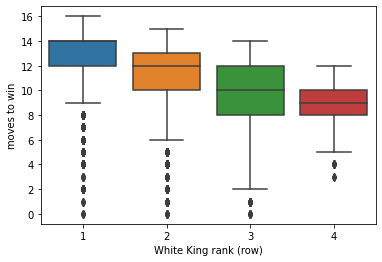

In [16]:
sns.boxplot(x="White King rank (row)", y="moves to win", data=df2)

Figure - 3

In the above figure white king’s moves are calculated in order to win, the maximum moves for him to win are 16. We can say that the boxplot is biased as it has only 1, 2, 3, 4 rank (row) which are only one fourth of the chess board. 

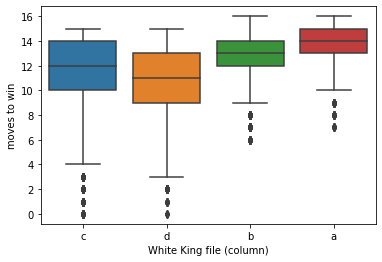

In [17]:
sns.boxplot(x="White King file (column)", y="moves to win", data=df2)

Figure - 4

The boxplot above consider only a, b, c, d files (column) to predict the moves to win and is incomplete as it has only a part of the chess board.

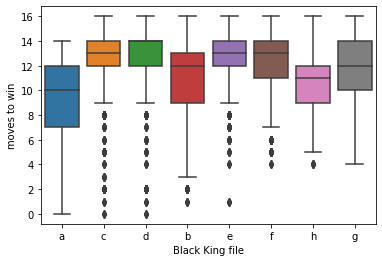

In [18]:
sns.boxplot(x="Black King file", y="moves to win", data=df2)

Figure - 5

The above boxplot represents the black king’s number of moves for it to win the game in 0-16 moves in the columns (a, b, c…, g) of the board. It has more frequency to win in between 7 and 12 moves. We can say this is completer and more accurate when compared to the white king’s plots. X-axis is black king file and y-axis is moves to win.

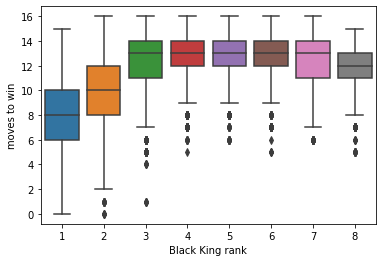

In [19]:
sns.boxplot(x="Black King rank", y="moves to win", data=df2)

Figure - 6

The x-axis represents black king’s rank and y-axis moves to win. In the above boxplot black king’s moves are predicted in the following rows 1, 2, 3…, 8 and represent the number of moves to win from one to sixteen and has the highest probability to win in 4, 5 and 6 row and in between 12 to 14 moves. 

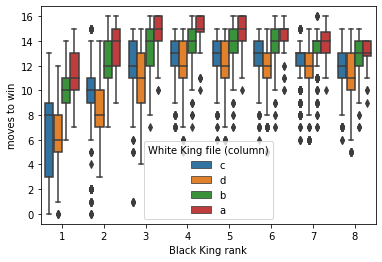

In [20]:
sns.boxplot(x="Black King rank", y="moves to win", hue ="White King file (column)", data=df2)

Figure - 7

This box plot is the comparison of white king’s and black king’s number of moves to win in the game in x-axis we represent the row in which black king moves and y-axis is the number of moves to win. As we can see the blue color represents ‘c’ column and has highest probability.

# Relationship between position and chances of winning?

The objective is to checkmate black king with white king and rook. We require both white king and rook to checkmate black king. The checkmate happens at the back rank and more often on corner squares which is done with the black king and rook. King moves one step in any direction and Rook moves in horizontal and vertical direction (straight line), So the relationship which we observe is, <br>
The minimum chebyshev distance from black king to corner squares is directly proportional to number of moves for checkmate.<br>

The minimum chebyshev distance from white king to white rook corner squares is directly proportional to number of moves for checkmate. <br>

The minimum chebyshev distance from black king to white rook, is inversely proportional to number of moves for checkmate as black king can attack the rook. <br>

Rook is required for checkmate task as well, so we take the Manhattan distance between rook, white king and rook, black king. <br>


# Modelling

We took df and copied in new data frame as the modeling requirement

# 1. BINARY CLASSIFICATION

Binary classification is the simplest machine learning technique which categories data into two points eg: 0 or 1, T or F, Black or White etc.
Here we have classified draw as 0 and remaining 15 moves as 1. When found the number of moves to win.


We will take df dataframe and do required preprocessing.

In [21]:
model1_df = df.copy()

In [22]:
mapping_y = mapping = {'zero':1,'one':1,'two':1,'three':1,'four':1,'five':1,'six':1,'seven':1,
                      'eight':1,'nine':1,'ten':1,'eleven':1,'twelve':1,'thirteen':1,'fourteen':1,
                      'fifteen':1,'sixteen':1, 'draw':0}

Every thing is 1 but draw for binary classification

In [23]:
mapping_x = {1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8'}

In [24]:
model1_df['moves to win'] = model1_df['moves to win'].map(mapping_y)

In [25]:
model1_df['White King rank (row)'] = model1_df['White King rank (row)'].map(mapping_x)
model1_df['White Rook rank'] = model1_df['White Rook rank'].map(mapping_x)
model1_df['Black King rank'] = model1_df['Black King rank'].map(mapping_x)

In [26]:
moves_count = model1_df['moves to win'].value_counts()
moves_count

1    25260
0     2795
Name: moves to win, dtype: int64

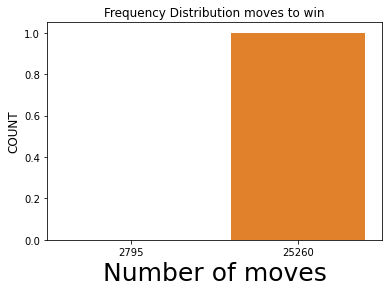

In [27]:

sns.barplot( moves_count.values, moves_count.index,alpha= 1)
plt.title('Frequency Distribution moves to win')
plt.ylabel('COUNT', fontsize=12)
plt.xlabel('Number of moves', fontsize=25)
plt.show()

Figure - 8

We have found that 1 has more count when compared to 0 (draw). It is very obvious that the data is unbalanced, an uneven dataset is one in which the target variable has more observations in one specific class than the other class. 

In [28]:
model1_df.head()

,White King file (column),White King rank (row),White Rook file,White Rook rank,Black King file,Black King rank,moves to win
0,a,1,c,1,c,2,0
1,a,1,c,1,d,1,0
2,a,1,c,1,d,2,0
3,a,1,c,2,c,1,0
4,a,1,c,2,c,3,0


In [29]:
Y = model1_df['moves to win']

In [30]:
model1_df.drop(['moves to win'], axis = 1, inplace = True) 

In [31]:
model1_df.head()

,White King file (column),White King rank (row),White Rook file,White Rook rank,Black King file,Black King rank
0,a,1,c,1,c,2
1,a,1,c,1,d,1
2,a,1,c,1,d,2
3,a,1,c,2,c,1
4,a,1,c,2,c,3


# Creating dummies (One hot encoding)

In [32]:
dummy=pd.get_dummies(model1_df)
oh_df=pd.concat([model1_df,dummy],axis=1)

Learn about one hot encoding <br>
What is One Hot Encoding? Why And When do you have to use it? (2020, May 8). Retrieved from https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

In [33]:
col = list(oh_df.columns)

In [34]:
col.remove('White King file (column)')
col.remove('White King rank (row)')
col.remove('White Rook file')
col.remove('White Rook rank')
col.remove('Black King file')
col.remove('Black King rank')

Removing unwanted column.

In [35]:
oh_df[col].head()

,White King file (column)_a,White King file (column)_b,White King file (column)_c,White King file (column)_d,White King rank (row)_1,White King rank (row)_2,White King rank (row)_3,White King rank (row)_4,White Rook file_a,White Rook file_b,...,Black King file_g,Black King file_h,Black King rank_1,Black King rank_2,Black King rank_3,Black King rank_4,Black King rank_5,Black King rank_6,Black King rank_7,Black King rank_8
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [36]:
final_m1_df = oh_df[col].copy()

# Pycaret

For this dataset we have used an open source library called PyCaret which is used to train and deploy machine learning models. This library helps replace hundreds of lines of codes in a few words. This is very simple and easy to use. PyCaret provides all the models with Accuracy, AUC, Recall, Precision, F1 and Kappa.

In [37]:
py_data = final_m1_df.copy()

In [38]:
py_data['moves to win'] = Y

In [39]:
py_data.head()

,White King file (column)_a,White King file (column)_b,White King file (column)_c,White King file (column)_d,White King rank (row)_1,White King rank (row)_2,White King rank (row)_3,White King rank (row)_4,White Rook file_a,White Rook file_b,...,Black King file_h,Black King rank_1,Black King rank_2,Black King rank_3,Black King rank_4,Black King rank_5,Black King rank_6,Black King rank_7,Black King rank_8,moves to win
0,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [40]:
py_data['moves to win'] = Y

In [41]:
py_data.head()

,White King file (column)_a,White King file (column)_b,White King file (column)_c,White King file (column)_d,White King rank (row)_1,White King rank (row)_2,White King rank (row)_3,White King rank (row)_4,White Rook file_a,White Rook file_b,...,Black King file_h,Black King rank_1,Black King rank_2,Black King rank_3,Black King rank_4,Black King rank_5,Black King rank_6,Black King rank_7,Black King rank_8,moves to win
0,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [43]:
data_setup = setup(data = py_data, target = 'moves to win')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,294
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(28055, 41)"
4,Missing Values,False
5,Numeric Features,40
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [44]:
compare_models(fold = 2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.995700,0.999400,0.996400,0.998900,0.997600,0.976500
1,CatBoost Classifier,0.995000,0.999600,0.996000,0.998400,0.997200,0.972200
2,Extra Trees Classifier,0.941400,0.972100,0.998800,0.939900,0.968400,0.563000
3,Decision Tree Classifier,0.940000,0.825100,0.968500,0.964900,0.966700,0.661400
4,Random Forest Classifier,0.928800,0.912700,0.988900,0.935700,0.961600,0.485700
5,Gradient Boosting Classifier,0.914800,0.974000,0.999500,0.913900,0.954800,0.237600
6,Extreme Gradient Boosting,0.909900,0.966400,0.999900,0.909100,0.952300,0.160900
7,K Neighbors Classifier,0.907800,0.824000,0.991300,0.913600,0.950900,0.218600
8,Logistic Regression,0.900400,0.632300,1.000000,0.900400,0.947600,0.000000
9,SVM - Linear Kernel,0.900400,0.000000,1.000000,0.900400,0.947600,0.000000


In [45]:
X  = final_m1_df.copy()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

Splitting data into training and testing


Dividing Data into test train

To model data we have to divide the entire dataset into Training and testing sets. The model is usually fit into a training set which contains an output. A test model is subset of the trained model which is used to assess the performance of the model. 80% of the data usually comes under training data and the remaining 20% is for testing data set.


From the above information, accuracy is very intuitive, yet it may be a very poor measure for imbalanced data.

# Why Accuracy fails for imbalanced classification:

Classification accuracy is the most-used metric for evaluating classification models. The reason for its wide use is because it is easy to calculate, easy to interpret, and is a single number to summarize the model’s capability. When the class distribution is slightly skewed, accuracy can still be a useful metric. When the skew in the class distributions are severe, accuracy can become an unreliable measure of model performance. Thus, accuracy fails for imbalanced classification.

So, which metrics can we use when our data is unbalanced?

1)	AUC CURVE:

AUC stands for "Area under the ROC Curve." The range of AUC is from 0 to 1. When a model is 100% wrong then it has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.AUC provides a comprehensive measure of performance across all possible classification thresholds. One way of interpreting AUC is by finding the probability of the model that ranks a random positive more highly than a random negative.
AUC is suitable for the following two reasons: <br>
●	AUC is scale invariant. It measures how well predictions are ranked, rather than their absolute values. <br>
●	AUC is classification-threshold-invariant. It helps in measuring the quality of the model's predictions irrespective of what classification threshold is chosen.


2)	Confusion matrix:

Confusion matrix is a summary of the predictions made by a classification model organized into a table by class. Each row of the table indicates the actual class and each column represents the predicted class. A value in the cell is a count of the number of predictions made for a class that are actually for a given class. The cells on the diagonal represent correct predictions, where a predicted and expected class align. 


Rocca, B. (2019, March 30). Handling imbalanced datasets in machine learning. Retrieved from https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28

# 1. DECISION TREE

It is one the most popular machine learning algorithm used for both classification and regression tasks. The main goal of a Decision Tree is to construct a training model which can help to predict the class or value of the target variable from prior data (training data). 

In [47]:
dt = tree.DecisionTreeClassifier()

In [48]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [49]:
probs = dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probs)

In [50]:
auc(fpr,tpr)

0.9563246502104424

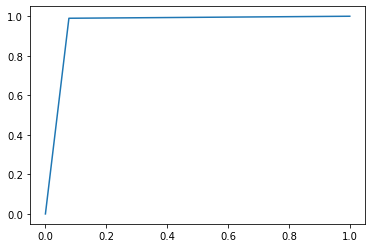

In [51]:
plt.plot(fpr,tpr)

Figure - 9

This plot provides 90% of the AUC probability distinguishing the FPR and TPR.

In [52]:
clas = dt.predict(X_test) 

In [53]:
clas = dt.predict(X_test) 

In [54]:
acc = accuracy_score(y_test, clas)

In [55]:
acc

0.9827125289609695

In [56]:
confusion_matrix(y_test, clas)

array([[ 550,   46],
       [  51, 4964]], dtype=int64)

# 2. LOGISTIC REGRESSION

Logistic regression is one of the supervised classification algorithms used for binary classification. It gives a discrete binary outcome between 0 and 1. This algorithm works by measuring the relationship between the dependent variable and one or more independent variables 

In [57]:
lr = LogisticRegression()

In [58]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
probs = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probs)

In [61]:
auc(fpr,tpr)

0.6401456703714359

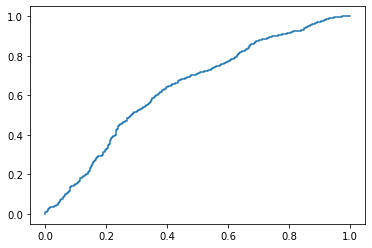

In [62]:
plt.plot(fpr,tpr)

Figure - 10

From the above plot, it is difficult to find as both negatives and positives are mixed up in the graph.

In [63]:
clas = lr.predict(X_test) 

In [64]:
acc

0.9827125289609695

In [65]:
confusion_matrix(y_test, clas)

array([[   0,  596],
       [   0, 5015]], dtype=int64)

# Random Forest

Random Forest is a predictive modeling algorithm which is used for both classification and regression tasks. It works well with default hyper parameter. It can be used to rank the importance of variables in a regression or classification problem. 

In [66]:
rf = RandomForestClassifier(n_estimators = 100, n_jobs= -1)

In [67]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [68]:
probs = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probs)

In [69]:

auc(fpr,tpr)

0.9980017999692199

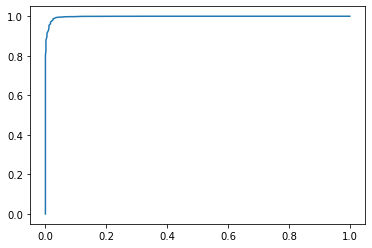

In [70]:
plt.plot(fpr,tpr)

Figure - 11

In [71]:
clas = rf.predict(X_test)

In [72]:
acc = accuracy_score(y_test, clas)

acc

0.9556228836214579

In [73]:
confusion_matrix(y_test, clas)

array([[ 347,  249],
       [   0, 5015]], dtype=int64)

# CONCLUSION

By using machine learning algorithms we can easily predict the outcomes of chess endgames. These models are trained with the dataset and gives the accuracy score as results. From all the algorithms Random Forest algorithm gives the best accuracy score in King-Rook vs. King with an AUC of 99.8% when compared to others.  


# 2. MODELLING 2.2

# MULTICLASS CLASSIFICATION WITHOUT FEATURE ENGINEERING:

 
In machine learning, multiclass classification is the practice of classifying into one or more classes. It is also a problem in the ground of supervised learning. The main task is the prediction of one class out of a finite set of three or more possible classes for each instance. 


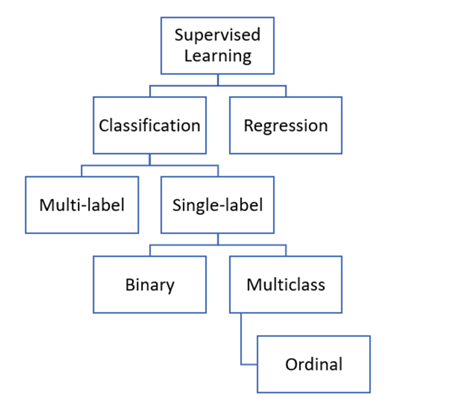

Fürnkranz, J., Zopf, M., & Einreichung, T. der. (1970, January 1). [PDF] Sentiment Classification of Chess Annotations: Semantic Scholar. Retrieved from https://www.semanticscholar.org/paper/Sentiment-Classification-of-Chess-Annotations-Fürnkranz-Zopf/ba6e901d378f282efa8ccc4eaaef521d0406135d

Figure - 12

From the figure, we can say supervised learning is distinguished into classification and regression. First, it is classification because the values are finite but in regression it is continuous. Furthermore, the classification is divided into multi-label and single-label since each instance can be associated with any number of classes, also known as labels. Finally, the model is learned to be from a set of k classes with k > 2, i.e. a set {1,2,...,k}. This makes the problem slightly different and difficult than binary classification with k = 2. Ordinal classification is a specialization of multiclass classification.. 

Here we have classified each move from 0 to 16 which helped us find the number of counts for each move to win.

In [74]:
modelm_df = df.copy()

We will use df and do required reprocessing for the modeling.

In [75]:
modelm_df= modelm_df[modelm_df['moves to win'] != 'draw'] 

Removing draw from moves to win

In [76]:
mapping_y = mapping = {'zero':0,'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,
                      'eight':8,'nine':9,'ten':10,'eleven':11,'twelve':12,'thirteen':13,'fourteen':14,
                      'fifteen':15,'sixteen':16}

In [77]:
modelm_df['moves to win'] = modelm_df['moves to win'].map(mapping_y)

In [78]:
mapping_x = {1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8'}

In [79]:
modelm_df['White King rank (row)'] = modelm_df['White King rank (row)'].map(mapping_x)
modelm_df['White Rook rank'] = modelm_df['White Rook rank'].map(mapping_x)
modelm_df['Black King rank'] = modelm_df['Black King rank'].map(mapping_x)

In [80]:
modelm_df.head()

,White King file (column),White King rank (row),White Rook file,White Rook rank,Black King file,Black King rank,moves to win
2795,c,1,a,3,a,1,0
2796,c,1,a,4,a,1,0
2797,c,1,a,5,a,1,0
2798,c,1,a,6,a,1,0
2799,c,1,a,7,a,1,0


In [81]:
modelm_df = modelm_df.reset_index()
modelm_df.drop(['index'], axis = 1, inplace = True)

Reseting the index.

In [82]:
modelm_df.head()

,White King file (column),White King rank (row),White Rook file,White Rook rank,Black King file,Black King rank,moves to win
0,c,1,a,3,a,1,0
1,c,1,a,4,a,1,0
2,c,1,a,5,a,1,0
3,c,1,a,6,a,1,0
4,c,1,a,7,a,1,0


In [83]:
Y = modelm_df['moves to win']

In [84]:
modelm_df.drop(['moves to win'], axis = 1, inplace = True) 

In [85]:
dummy=pd.get_dummies(modelm_df)
oh_df_m=pd.concat([modelm_df,dummy],axis=1)

In [86]:
col = list(oh_df_m.columns)

In [87]:
col.remove('White King file (column)')
col.remove('White King rank (row)')
col.remove('White Rook file')
col.remove('White Rook rank')
col.remove('Black King file')
col.remove('Black King rank')

In [88]:
final_m_df = oh_df_m[col].copy()

In [89]:
final_m_df.columns

Index(['White King file (column)_a', 'White King file (column)_b',
       'White King file (column)_c', 'White King file (column)_d',
       'White King rank (row)_1', 'White King rank (row)_2',
       'White King rank (row)_3', 'White King rank (row)_4',
       'White Rook file_a', 'White Rook file_b', 'White Rook file_c',
       'White Rook file_d', 'White Rook file_e', 'White Rook file_f',
       'White Rook file_g', 'White Rook file_h', 'White Rook rank_1',
       'White Rook rank_2', 'White Rook rank_3', 'White Rook rank_4',
       'White Rook rank_5', 'White Rook rank_6', 'White Rook rank_7',
       'White Rook rank_8', 'Black King file_a', 'Black King file_b',
       'Black King file_c', 'Black King file_d', 'Black King file_e',
       'Black King file_f', 'Black King file_g', 'Black King file_h',
       'Black King rank_1', 'Black King rank_2', 'Black King rank_3',
       'Black King rank_4', 'Black King rank_5', 'Black King rank_6',
       'Black King rank_7', 'Black King rank

In [90]:
final_m_df.head()

,White King file (column)_a,White King file (column)_b,White King file (column)_c,White King file (column)_d,White King rank (row)_1,White King rank (row)_2,White King rank (row)_3,White King rank (row)_4,White Rook file_a,White Rook file_b,...,Black King file_g,Black King file_h,Black King rank_1,Black King rank_2,Black King rank_3,Black King rank_4,Black King rank_5,Black King rank_6,Black King rank_7,Black King rank_8
0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [91]:
py_data = final_m_df.copy()

In [92]:
py_data['moves to win'] = Y

In [93]:
py_data.head()

,White King file (column)_a,White King file (column)_b,White King file (column)_c,White King file (column)_d,White King rank (row)_1,White King rank (row)_2,White King rank (row)_3,White King rank (row)_4,White Rook file_a,White Rook file_b,...,Black King file_h,Black King rank_1,Black King rank_2,Black King rank_3,Black King rank_4,Black King rank_5,Black King rank_6,Black King rank_7,Black King rank_8,moves to win
0,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [95]:
data_setup = setup(data = py_data, target = 'moves to win')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,620
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(25260, 41)"
4,Missing Values,False
5,Numeric Features,40
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [96]:
compare_models(fold = 2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.696500,0.000000,0.698900,0.696900,0.695300,0.655700
1,Extra Trees Classifier,0.680500,0.000000,0.649500,0.680400,0.678500,0.637300
2,Light Gradient Boosting Machine,0.665100,0.000000,0.632300,0.666800,0.664200,0.619700
3,Random Forest Classifier,0.602500,0.000000,0.550700,0.600600,0.598100,0.547400
4,Decision Tree Classifier,0.548000,0.000000,0.546400,0.649800,0.586500,0.496500
5,K Neighbors Classifier,0.531500,0.000000,0.452600,0.534400,0.525000,0.464100
6,Gradient Boosting Classifier,0.519300,0.000000,0.535800,0.520400,0.511300,0.450700
7,Extreme Gradient Boosting,0.492200,0.000000,0.478300,0.494500,0.481100,0.418200
8,Logistic Regression,0.392600,0.000000,0.304900,0.375500,0.371200,0.301500
9,Ada Boost Classifier,0.385100,0.000000,0.316900,0.376400,0.369700,0.292400


From the above information for modelling 2.2 we have considered only the accuracy and multilabel confusion matrix.  of a model rather than AUC because the value seems to be zero for all the models. 

In [97]:
X = final_m_df

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# MULTI-LABEL CONFUSION MATRIX :


The multi-label confusion matrix helps in calculating class-wise or sample-wise multilabel confusion matrices, and in multiclass tasks, labels are binarized while confusion matrix calculates matrix between every two classes in one confusion matrix.


# 1.Decision Tree

In [99]:
dt =  OneVsRestClassifier(tree.DecisionTreeClassifier())

In [100]:
dt.fit(X_train,y_train)

OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,
                                       

In [101]:
probs = dt.predict_proba(X_test)

In [102]:
clas = dt.predict(X_test)

In [103]:
acc = accuracy_score(y_test, clas)

In [104]:
multilabel_confusion_matrix(y_test, clas)

array([[[5044,    0],
        [   2,    6]],

       [[5036,    0],
        [   3,   13]],

       [[5014,    2],
        [   3,   33]],

       [[5026,    5],
        [   6,   15]],

       [[5012,    0],
        [  18,   22]],

       [[4943,    5],
        [  31,   73]],

       [[4906,   15],
        [  46,   85]],

       [[4905,   18],
        [  51,   78]],

       [[4749,   21],
        [  66,  216]],

       [[4645,   52],
        [ 108,  247]],

       [[4563,   88],
        [ 118,  283]],

       [[4396,   79],
        [ 179,  398]],

       [[4197,  157],
        [ 210,  488]],

       [[4077,  120],
        [ 213,  642]],

       [[4005,  141],
        [ 168,  738]],

       [[4585,   55],
        [  61,  351]],

       [[4436,  535],
        [  10,   71]]], dtype=int64)

# 2. Logistic Regression

In [105]:
lr =  OneVsRestClassifier(LogisticRegression(multi_class='ovr'))

In [106]:
lr.fit(X_train,y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='ovr', n_jobs=None,
                                                 penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [107]:
probs = lr.predict_proba(X_test)

In [108]:
clas = lr.predict(X_test)

In [109]:
acc = accuracy_score(y_test, clas)
acc

0.40736342042755347

In [110]:
multilabel_confusion_matrix(y_test, clas)

array([[[5044,    0],
        [   8,    0]],

       [[5035,    1],
        [  16,    0]],

       [[4983,   33],
        [  14,   22]],

       [[5030,    1],
        [  17,    4]],

       [[5003,    9],
        [  22,   18]],

       [[4905,   43],
        [  62,   42]],

       [[4868,   53],
        [  81,   50]],

       [[4900,   23],
        [ 126,    3]],

       [[4524,  246],
        [ 134,  148]],

       [[4572,  125],
        [ 267,   88]],

       [[4514,  137],
        [ 382,   19]],

       [[4159,  316],
        [ 465,  112]],

       [[3884,  470],
        [ 472,  226]],

       [[3526,  671],
        [ 439,  416]],

       [[3448,  698],
        [ 260,  646]],

       [[4484,  156],
        [ 175,  237]],

       [[4959,   12],
        [  54,   27]]], dtype=int64)

# 3. Random Forest

In [111]:
rf = OneVsRestClassifier(RandomForestClassifier(n_estimators=500, n_jobs=-1))

In [112]:
rf.fit(X_train,y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                            

In [113]:
probs = rf.predict_proba(X_test)

In [114]:
clas = rf.predict(X_test)

In [115]:
acc = accuracy_score(y_test, clas)
acc

0.7931512272367379

In [116]:
multilabel_confusion_matrix(y_test, clas)

array([[[5044,    0],
        [   1,    7]],

       [[5036,    0],
        [   1,   15]],

       [[5012,    4],
        [   0,   36]],

       [[5029,    2],
        [   8,   13]],

       [[5006,    6],
        [  11,   29]],

       [[4918,   30],
        [  19,   85]],

       [[4889,   32],
        [  28,  103]],

       [[4899,   24],
        [  38,   91]],

       [[4707,   63],
        [  61,  221]],

       [[4628,   69],
        [  87,  268]],

       [[4580,   71],
        [ 117,  284]],

       [[4334,  141],
        [ 125,  452]],

       [[4187,  167],
        [ 164,  534]],

       [[4034,  163],
        [ 194,  661]],

       [[3957,  189],
        [  94,  812]],

       [[4563,   77],
        [  63,  349]],

       [[4964,    7],
        [  34,   47]]], dtype=int64)

# CONCLUSION FOR MODELLING 2.2:


From the algorithms, the accuracy results obtained are <br>
Accuracy using decision tree – 76.9% <br>
Accuracy using Logistic Regression – 40.7% <br>
Accuracy using Random Forest – 80.4% <br>
From all the algorithms found, it is proved that Random Forest gives us best accuracy score in King-Rook vs. King. <br 


# Modeling 3

# MULTICLASS CLASSIFICATION WITH FEATURE ENGINEERING:

# What and Why is Feature Engineering Important?

The process of using domain knowledge to extract raw data via data mining techniques is known as feature engineering. Engineering good features allows us to represent the structure of the data accurately thereby creating a better model. Features can be engineered by decomposing or splitting features from external sources or by combining them into new features. Feature engineering can be considered as applied machine learning itself. Feature engineering also helps us solve issues like, <br>
•	Missing values can be imputed in data cleaning. <br>
•	Normalize or standardize the data if they do not belong to the same dimension. <br>
•	Filtering out redundant information in feature selection.
Since we are carrying out our modelling on chess dataset, we are using Manhattan distance and Chebyshev distance. <br>


Rathna, Ken, & Ambi. (2012, May 22). Euclidean vs Chebyshev vs Manhattan Distance. Retrieved from https://lyfat.wordpress.com/2012/05/22/euclidean-vs-chebyshev-vs-manhattan-distance/

# MANHATTAN DISTANCE:

Manhattan distance is defined as the distance between two points measured along axes at right angles. In a plane with p1 at (x1, y1) and p2 at (x2, y2), it is |x1 - x2| + |y1 - y2|.
Manhattan distance is the rectilinear distance between two points. For example, if we look at the figure below the purple line depicts the Manhattan distance between the two points A and B.

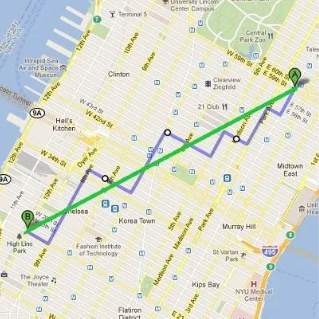

Figure - 13


In chess, the distance between squares on the chessboard for rooks is measured in Manhattan distance.
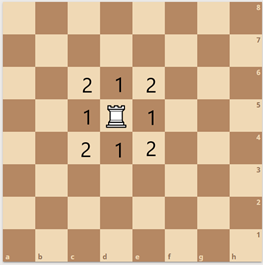

Figure - 14

For example, if we place the rook in column d and row 5 the Manhattan distance to column e and row 6 is 2 (as shown in the above figure).

# Chebyshev Distance:



The Chebyshev distance is also known as chessboard distance, as in the chess game it is the minimum number of moves needed by a king to go from one square on the chess board to another 


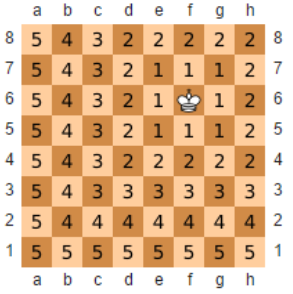

Figure - 15

Distances in Classification. (n.d.). IEEE MOROCCO - Home. http://www.ieee.ma/uaesb/pdf/distances-in-classification.pdf

For example, if we place the king in column g and row 6 the Chebyshev distance to the square at column b and row 5 is 4 (as shown in the above figure).

In [117]:
modelm_df = df.copy()

In [118]:
modelm_df= modelm_df[modelm_df['moves to win'] != 'draw'] 

In [119]:
mapping_y = mapping = {'zero':0,'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,
                      'eight':8,'nine':9,'ten':10,'eleven':11,'twelve':12,'thirteen':13,'fourteen':14,
                      'fifteen':15,'sixteen':16}

In [120]:
modelm_df['moves to win'] = modelm_df['moves to win'].map(mapping_y)

In [121]:
modelm_df

,White King file (column),White King rank (row),White Rook file,White Rook rank,Black King file,Black King rank,moves to win
2795,c,1,a,3,a,1,0
2796,c,1,a,4,a,1,0
2797,c,1,a,5,a,1,0
2798,c,1,a,6,a,1,0
2799,c,1,a,7,a,1,0
...,...,...,...,...,...,...,...
28050,b,1,g,7,e,5,16
28051,b,1,g,7,e,6,16
28052,b,1,g,7,e,7,16
28053,b,1,g,7,f,5,16


In [122]:
modelm_df = modelm_df.reset_index()
modelm_df.drop(['index'], axis = 1, inplace = True)

Reseting index

In [123]:
modelm_df.head()

,White King file (column),White King rank (row),White Rook file,White Rook rank,Black King file,Black King rank,moves to win
0,c,1,a,3,a,1,0
1,c,1,a,4,a,1,0
2,c,1,a,5,a,1,0
3,c,1,a,6,a,1,0
4,c,1,a,7,a,1,0


In [124]:
Y = modelm_df['moves to win']

In [125]:
modelm_df.drop(['moves to win'], axis = 1, inplace = True) 

# Implementing Chebyshev, Manhattan distance

In [126]:
def manhattan(x1,x2,y1,y2):
    n = len(x1)
    distance = []
    for i in range(0,n):    
        dis = abs(x2[i]-x1[i]) + abs(y2[i]-y1[i])
        distance.append(dis)
    return distance

In [127]:
def chebyshev(x1,x2,y1,y2):
    n = len(x1)
    distance = []
    for i in range(0,n):
        dis = max(abs(x2[i]-x1[i]) , abs(y2[i]-y1[i]))
        distance.append(dis)
    return distance

In [128]:
mapping_x = {'a':1,'b':2,'c':3,'d':4,'e':5,'f':6,'g':7,'h':8}

In [129]:
modelm_df['white King file num'] = modelm_df['White King file (column)'].map(mapping_x)
modelm_df['White Rook file num'] = modelm_df['White Rook file'].map(mapping_x)
modelm_df['Black King file num'] = modelm_df['Black King file'].map(mapping_x)

In [130]:
d = chebyshev(modelm_df['white King file num'],modelm_df['White King rank (row)'],
              modelm_df['Black King file num'],modelm_df['Black King rank'])
modelm_df['che dis between kings'] = d

In [131]:
d = chebyshev(modelm_df['white King file num'],modelm_df['White King rank (row)'],
              modelm_df['White Rook file num'],modelm_df['White Rook rank'])
modelm_df['che dis between WK R'] = d

In [132]:
d = chebyshev(modelm_df['White Rook file num'],modelm_df['White Rook rank'],
              modelm_df['Black King file num'],modelm_df['Black King rank'])
modelm_df['che dis between BK R'] = d

In [133]:
d = manhattan(modelm_df['white King file num'],modelm_df['White King rank (row)'],
              modelm_df['White Rook file num'],modelm_df['White Rook rank'])
modelm_df['man dis between WK R'] = d

In [134]:
d = manhattan(modelm_df['White Rook file num'],modelm_df['White Rook rank'],
              modelm_df['Black King file num'],modelm_df['Black King rank'])
modelm_df['man dis between BK R'] = d

In [135]:
modelm_df.head()

,White King file (column),White King rank (row),White Rook file,White Rook rank,Black King file,Black King rank,white King file num,White Rook file num,Black King file num,che dis between kings,che dis between WK R,che dis between BK R,man dis between WK R,man dis between BK R
0,c,1,a,3,a,1,3,1,1,2,2,2,4,2
1,c,1,a,4,a,1,3,1,1,2,3,3,5,3
2,c,1,a,5,a,1,3,1,1,2,4,4,6,4
3,c,1,a,6,a,1,3,1,1,2,5,5,7,5
4,c,1,a,7,a,1,3,1,1,2,6,6,8,6


In [136]:
modelm_df.drop(['white King file num'], axis = 1, inplace = True) 
modelm_df.drop(['Black King file num'], axis = 1, inplace = True) 
modelm_df.drop(['White Rook file num'], axis = 1, inplace = True) 

In [137]:
modelm_df.head()

,White King file (column),White King rank (row),White Rook file,White Rook rank,Black King file,Black King rank,che dis between kings,che dis between WK R,che dis between BK R,man dis between WK R,man dis between BK R
0,c,1,a,3,a,1,2,2,2,4,2
1,c,1,a,4,a,1,2,3,3,5,3
2,c,1,a,5,a,1,2,4,4,6,4
3,c,1,a,6,a,1,2,5,5,7,5
4,c,1,a,7,a,1,2,6,6,8,6


In [138]:
che_dis_bw_k = modelm_df['che dis between kings']
che_dis_bw_wk_r = modelm_df['che dis between WK R']
che_dis_bw_bk_r = modelm_df['che dis between BK R']

In [139]:
man_dis_bw_wk_r = modelm_df['man dis between WK R']
man_bw_bk_r = modelm_df['man dis between BK R']

In [140]:
modelm_df.drop(['che dis between kings'], axis = 1, inplace = True) 
modelm_df.drop(['che dis between WK R'], axis = 1, inplace = True) 
modelm_df.drop(['che dis between BK R'], axis = 1, inplace = True) 

In [141]:
modelm_df.drop(['man dis between WK R'], axis = 1, inplace = True) 
modelm_df.drop(['man dis between BK R'], axis = 1, inplace = True)

In [142]:
modelm_df.head()

,White King file (column),White King rank (row),White Rook file,White Rook rank,Black King file,Black King rank
0,c,1,a,3,a,1
1,c,1,a,4,a,1
2,c,1,a,5,a,1
3,c,1,a,6,a,1
4,c,1,a,7,a,1


In [143]:
mapping_x = {1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8'}
modelm_df['White King rank (row)'] = modelm_df['White King rank (row)'].map(mapping_x)
modelm_df['White Rook rank'] = modelm_df['White Rook rank'].map(mapping_x)
modelm_df['Black King rank'] = modelm_df['Black King rank'].map(mapping_x)

In [144]:
modelm_df.head()

,White King file (column),White King rank (row),White Rook file,White Rook rank,Black King file,Black King rank
0,c,1,a,3,a,1
1,c,1,a,4,a,1
2,c,1,a,5,a,1
3,c,1,a,6,a,1
4,c,1,a,7,a,1


# One hot encoding

In [145]:
dummy=pd.get_dummies(modelm_df)
oh_df_m=pd.concat([modelm_df,dummy],axis=1)

In [146]:
col = list(oh_df_m.columns)

In [147]:
col.remove('White King file (column)')
col.remove('White King rank (row)')
col.remove('White Rook file')
col.remove('White Rook rank')
col.remove('Black King file')
col.remove('Black King rank')

In [148]:
oh_df_m = oh_df_m[col]

In [149]:
final_m_df = oh_df_m[col].copy()

In [150]:
final_m_df.columns

Index(['White King file (column)_a', 'White King file (column)_b',
       'White King file (column)_c', 'White King file (column)_d',
       'White King rank (row)_1', 'White King rank (row)_2',
       'White King rank (row)_3', 'White King rank (row)_4',
       'White Rook file_a', 'White Rook file_b', 'White Rook file_c',
       'White Rook file_d', 'White Rook file_e', 'White Rook file_f',
       'White Rook file_g', 'White Rook file_h', 'White Rook rank_1',
       'White Rook rank_2', 'White Rook rank_3', 'White Rook rank_4',
       'White Rook rank_5', 'White Rook rank_6', 'White Rook rank_7',
       'White Rook rank_8', 'Black King file_a', 'Black King file_b',
       'Black King file_c', 'Black King file_d', 'Black King file_e',
       'Black King file_f', 'Black King file_g', 'Black King file_h',
       'Black King rank_1', 'Black King rank_2', 'Black King rank_3',
       'Black King rank_4', 'Black King rank_5', 'Black King rank_6',
       'Black King rank_7', 'Black King rank

In [151]:
final_m_df['che dis between kings'] = che_dis_bw_k
final_m_df['che dis between WK R'] = che_dis_bw_wk_r
final_m_df['che dis between BK R'] = che_dis_bw_bk_r

In [152]:
final_m_df['man dis between WK R'] = man_dis_bw_wk_r
final_m_df['man dis between BK R'] = man_bw_bk_r

In [153]:
final_m_df

,White King file (column)_a,White King file (column)_b,White King file (column)_c,White King file (column)_d,White King rank (row)_1,White King rank (row)_2,White King rank (row)_3,White King rank (row)_4,White Rook file_a,White Rook file_b,...,Black King rank_4,Black King rank_5,Black King rank_6,Black King rank_7,Black King rank_8,che dis between kings,che dis between WK R,che dis between BK R,man dis between WK R,man dis between BK R
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,2,2,2,4,2
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,2,3,3,5,3
2,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,2,4,4,6,4
3,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,2,5,5,7,5
4,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,2,6,6,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25255,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,1,0
25256,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,1,1,1,1
25257,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,2,1,2,1,2
25258,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,1,1,1


In [154]:
py_data = final_m_df.copy()

In [155]:
py_data['moves to win'] = Y

In [156]:
py_data.head()

,White King file (column)_a,White King file (column)_b,White King file (column)_c,White King file (column)_d,White King rank (row)_1,White King rank (row)_2,White King rank (row)_3,White King rank (row)_4,White Rook file_a,White Rook file_b,...,Black King rank_5,Black King rank_6,Black King rank_7,Black King rank_8,che dis between kings,che dis between WK R,che dis between BK R,man dis between WK R,man dis between BK R,moves to win
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,2,2,2,4,2,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,2,3,3,5,3,0
2,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,2,4,4,6,4,0
3,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,2,5,5,7,5,0
4,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,2,6,6,8,6,0


In [157]:
data_setup = setup(data = py_data, target = 'moves to win')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,3012
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(25260, 46)"
4,Missing Values,False
5,Numeric Features,40
6,Categorical Features,5
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [158]:
compare_models(fold = 2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.653200,0.000000,0.642600,0.652600,0.651100,0.605800
1,Light Gradient Boosting Machine,0.618400,0.000000,0.555700,0.621100,0.617100,0.566200
2,Extra Trees Classifier,0.548500,0.000000,0.474100,0.543500,0.543900,0.486100
3,Gradient Boosting Classifier,0.504500,0.000000,0.480800,0.507000,0.496900,0.433000
4,Random Forest Classifier,0.488000,0.000000,0.405100,0.482000,0.479900,0.415500
5,Extreme Gradient Boosting,0.481700,0.000000,0.446700,0.484000,0.471300,0.405600
6,Decision Tree Classifier,0.467500,0.000000,0.422700,0.575800,0.505900,0.408300
7,Logistic Regression,0.404700,0.000000,0.324000,0.392300,0.390400,0.317400
8,Ada Boost Classifier,0.396300,0.000000,0.320600,0.390000,0.384700,0.306800
9,Linear Discriminant Analysis,0.371700,0.000000,0.362300,0.366400,0.357800,0.284200


# 1. Decision Tree

In [159]:
dt =  OneVsRestClassifier(tree.DecisionTreeClassifier())

In [160]:
dt.fit(X_train,y_train)

OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,
                                       

In [161]:
probs = dt.predict_proba(X_test)

In [162]:
acc = accuracy_score(y_test, clas)
acc

0.7931512272367379

In [163]:
multilabel_confusion_matrix(y_test, clas)

array([[[5044,    0],
        [   1,    7]],

       [[5036,    0],
        [   1,   15]],

       [[5012,    4],
        [   0,   36]],

       [[5029,    2],
        [   8,   13]],

       [[5006,    6],
        [  11,   29]],

       [[4918,   30],
        [  19,   85]],

       [[4889,   32],
        [  28,  103]],

       [[4899,   24],
        [  38,   91]],

       [[4707,   63],
        [  61,  221]],

       [[4628,   69],
        [  87,  268]],

       [[4580,   71],
        [ 117,  284]],

       [[4334,  141],
        [ 125,  452]],

       [[4187,  167],
        [ 164,  534]],

       [[4034,  163],
        [ 194,  661]],

       [[3957,  189],
        [  94,  812]],

       [[4563,   77],
        [  63,  349]],

       [[4964,    7],
        [  34,   47]]], dtype=int64)

# 2. Logistic Regression

In [164]:
lr =  OneVsRestClassifier(LogisticRegression(multi_class='ovr'))

In [165]:
lr.fit(X_train,y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='ovr', n_jobs=None,
                                                 penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [166]:
probs = lr.predict_proba(X_test)

In [167]:
clas = lr.predict(X_test)

In [168]:
acc = accuracy_score(y_test, clas)
acc

0.40736342042755347

In [169]:
multilabel_confusion_matrix(y_test, clas)

array([[[5044,    0],
        [   8,    0]],

       [[5035,    1],
        [  16,    0]],

       [[4983,   33],
        [  14,   22]],

       [[5030,    1],
        [  17,    4]],

       [[5003,    9],
        [  22,   18]],

       [[4905,   43],
        [  62,   42]],

       [[4868,   53],
        [  81,   50]],

       [[4900,   23],
        [ 126,    3]],

       [[4524,  246],
        [ 134,  148]],

       [[4572,  125],
        [ 267,   88]],

       [[4514,  137],
        [ 382,   19]],

       [[4159,  316],
        [ 465,  112]],

       [[3884,  470],
        [ 472,  226]],

       [[3526,  671],
        [ 439,  416]],

       [[3448,  698],
        [ 260,  646]],

       [[4484,  156],
        [ 175,  237]],

       [[4959,   12],
        [  54,   27]]], dtype=int64)

# 3. Random Forest

In [170]:
rf = OneVsRestClassifier(RandomForestClassifier(n_estimators=1000, n_jobs=-1))

In [171]:
rf.fit(X_train,y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                            

In [172]:
probs = rf.predict_proba(X_test)

In [173]:
clas = rf.predict(X_test)

In [174]:
acc = accuracy_score(y_test, clas)
acc

0.7929532858273951

In [175]:
multilabel_confusion_matrix(y_test, clas)

array([[[5044,    0],
        [   0,    8]],

       [[5036,    0],
        [   1,   15]],

       [[5013,    3],
        [   0,   36]],

       [[5028,    3],
        [   8,   13]],

       [[5006,    6],
        [  12,   28]],

       [[4915,   33],
        [  20,   84]],

       [[4888,   33],
        [  29,  102]],

       [[4898,   25],
        [  39,   90]],

       [[4708,   62],
        [  57,  225]],

       [[4636,   61],
        [  90,  265]],

       [[4576,   75],
        [ 120,  281]],

       [[4333,  142],
        [ 125,  452]],

       [[4190,  164],
        [ 163,  535]],

       [[4033,  164],
        [ 188,  667]],

       [[3957,  189],
        [  98,  808]],

       [[4561,   79],
        [  61,  351]],

       [[4964,    7],
        [  35,   46]]], dtype=int64)

# CONCLUSION FOR MODELLING 2.3:

From the algorithms, the accuracy results obtained are <br>
Accuracy using decision tree – 79.31% <br>
Accuracy using Logistic Regression – 40.7% <br>
Accuracy using Random Forest – 79.29% <br>
By using featuring engineering, it is proved that Random Forest gives us best accuracy score in King-Rook vs. King.  


# Conclusion
# Who will benefitted from the project?
Surely this is not the project to help the Grandmaster and International Master. This is helpful for the people who is new in the chess and wants to learn how to checkmate with the king and rook, although project doesn't give moves but gives the optimal moves which is required to checkmate the king with king and rook.


# Libraries used

1. numpy <br>
NumPy¶. (n.d.). Retrieved from https://numpy.org/ <br>
2. Pandas <br> 
pandas. (n.d.). Retrieved from https://pandas.pydata.org/ <br>
3. Sklearn <br> 
learn. (n.d.). Retrieved from https://scikit-learn.org/stable/ <br>
4. Pycaret <br> 
 Home. (2020, May 8). Retrieved from https://pycaret.org/<br>
5. Seaborn <br> 
statistical data visualization¶. (n.d.). Retrieved from https://seaborn.pydata.org/ <br>
6. Matplotlib <br> 
Visualization with Python¶. (n.d.). Retrieved from https://matplotlib.org/

# Data Set

(n.d.). Retrieved from https://archive.ics.uci.edu/ml/datasets/Chess (King-Rook vs. King)